<a href="https://colab.research.google.com/github/dalnim64/datam/blob/main/project_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/My Drive/pima-indians-diabetes3.csv')
print(df.head())

   pregnant  plasma  pressure  thickness  insulin   bmi  pedigree  age  \
0         6     148        72         35        0  33.6     0.627   50   
1         1      85        66         29        0  26.6     0.351   31   
2         8     183        64          0        0  23.3     0.672   32   
3         1      89        66         23       94  28.1     0.167   21   
4         0     137        40         35      168  43.1     2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


In [ ]:
df["diabetes"].value_counts()

,count
diabetes,
0,500
1,268


In [ ]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
colormap = plt.cm.plasma
plt.figure(figsize=(12, 12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

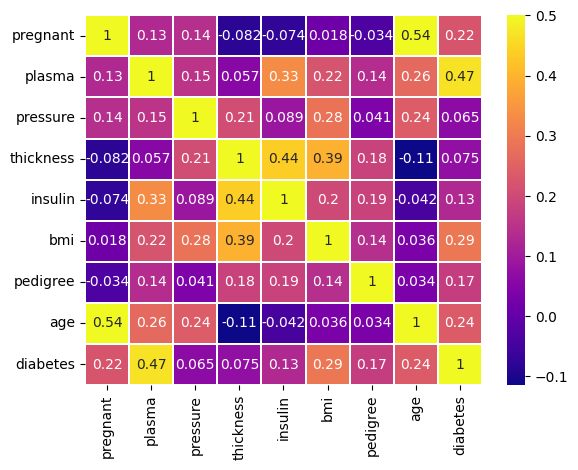

In [ ]:
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 세부 정보를 X로 지정
X = df.iloc[:,0:8]
# 당뇨병 여부를 Y로 지정
y = df.iloc[:,8]

In [ ]:
model1 = Sequential()
model1.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))
model1.add(Dropout(0.2))  # Dropout 추가
model1.add(Dense(8, activation='relu', name='Dense_2'))
model1.add(Dense(1, activation='sigmoid', name='Dense_3'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Dense_1 (Dense)                      │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4318 - loss: 5.1058 - val_accuracy: 0.5909 - val_loss: 0.8225
Epoch 2/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5464 - loss: 1.3048 - val_accuracy: 0.6299 - val_loss: 0.6998
Epoch 3/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5517 - loss: 1.0610 - val_accuracy: 0.6104 - val_loss: 0.6769
Epoch 4/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6544 - loss: 0.6908 - val_accuracy: 0.6688 - val_loss: 0.6615
Epoch 5/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6178 - loss: 0.7344 - val_accuracy: 0.6494 - val_loss: 0.6759
Epoch 6/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6426 - loss: 0.7280 - val_accuracy: 0.6623 - val_loss: 0.6553
Epoch 7/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6900 - loss: 0.6643 - val_accuracy: 0.6623 - val_loss: 0.6482
Epoch 8/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - loss: 0.6665 - val_accu

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
model2 = Sequential()
model2.add(Dense(16, input_dim=8, activation='relu', name='Dense_1'))
model2.add(Dropout(0.3))  # Dropout 추가
model2.add(Dense(12, activation='relu', name='Dense_2'))
model2.add(Dense(1, activation='sigmoid', name='Dense_3'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Dense_1 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 12)                  │             204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_3 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3770 - loss: 25.4971 - val_accuracy: 0.3442 - val_loss: 1.4025
Epoch 2/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3896 - loss: 4.2425 - val_accuracy: 0.5455 - val_loss: 0.8511
Epoch 3/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4839 - loss: 2.5041 - val_accuracy: 0.6364 - val_loss: 0.7630
Epoch 4/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5113 - loss: 1.4507 - val_accuracy: 0.6558 - val_loss: 0.6892
Epoch 5/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5634 - loss: 1.1729 - val_accuracy: 0.6494 - val_loss: 0.6778
Epoch 6/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6239 - loss: 0.8866 - val_accuracy: 0.6494 - val_loss: 0.6657
Epoch 7/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6225 - loss: 0.8602 - val_accuracy: 0.6494 - val_loss: 0.6568
Epoch 8/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6319 - loss: 0.8881 - val_acc

In [ ]:
loss1, accuracy1 = model1.evaluate(X_test, y_test)
print(f"Model 1 - Accuracy: {accuracy1:.4f}, Loss: {loss1:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6964 - loss: 0.5569 
Model 1 - Accuracy: 0.6948, Loss: 0.5702


In [ ]:
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"RandomForest - Accuracy: {rf_accuracy:.4f}")

RandomForest - Accuracy: 0.7208


In [ ]:
loss2, accuracy2 = model2.evaluate(X_test, y_test)
print(f"Model 2 - Accuracy: {accuracy2:.4f}, Loss: {loss2:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6570 - loss: 0.6451 
Model 2 - Accuracy: 0.6429, Loss: 0.6524


In [ ]:
y_pred1 = model1.predict(X_test)
y_pred1 = (y_pred1 > 0.5)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


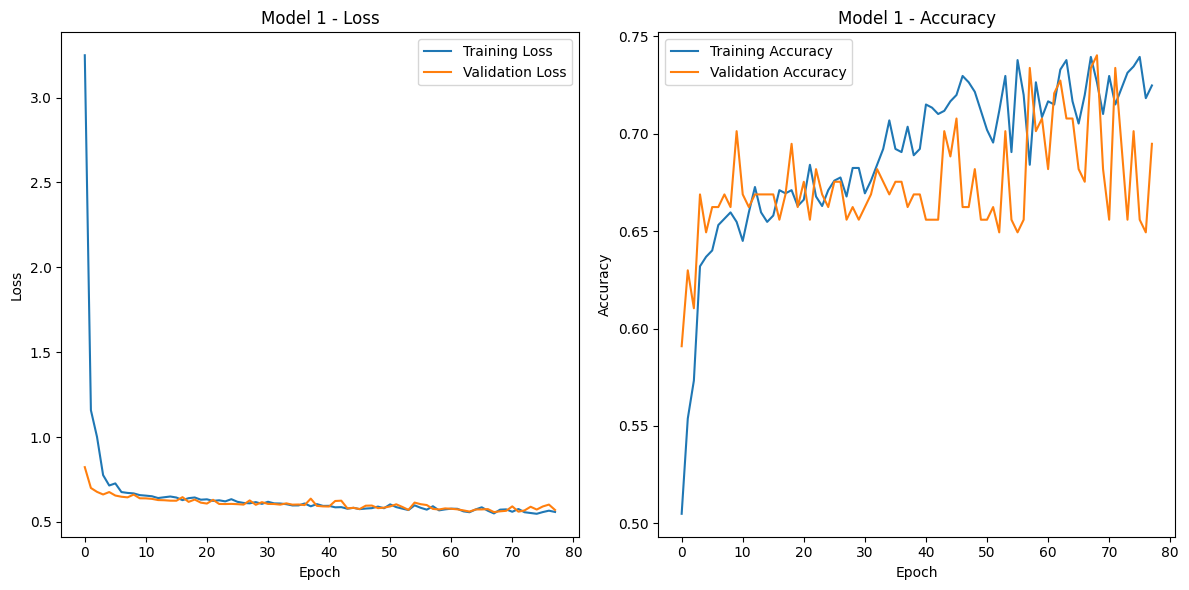

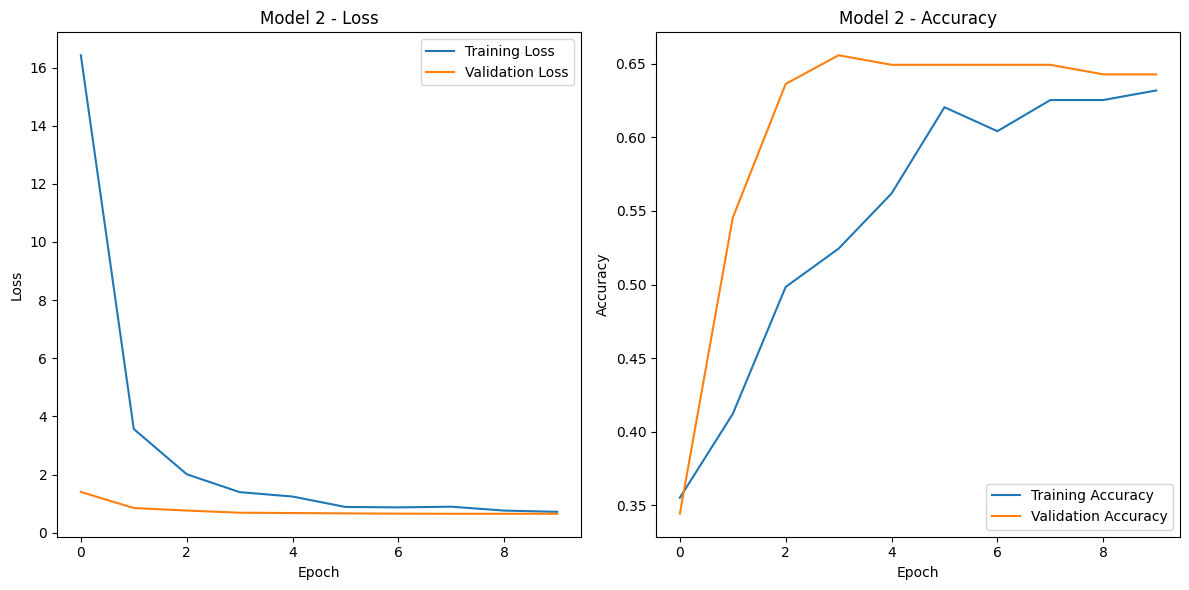

In [ ]:
def plot_history(history, model_name):
    plt.figure(figsize=(12, 6))

    # 손실 그래프
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # 정확도 그래프
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 딥러닝 모델 1 학습과정 시각화
plot_history(history1, "Model 1")

# 딥러닝 모델 2 학습과정 시각화
plot_history(history2, "Model 2")

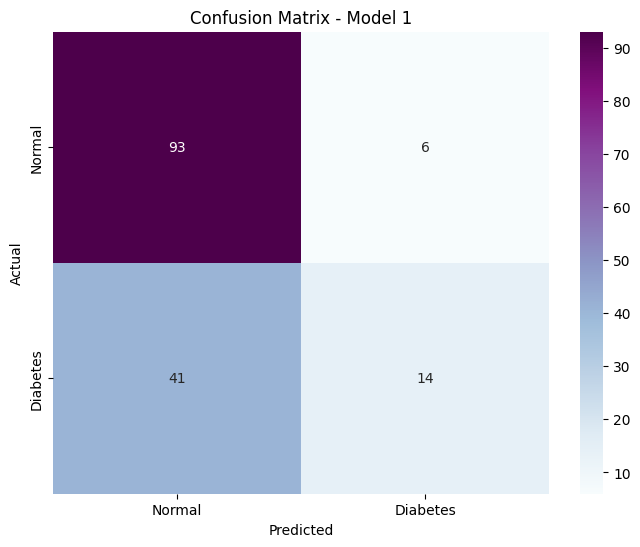

In [ ]:
cm1 = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='BuPu', xticklabels=['Normal', 'Diabetes'], yticklabels=['Normal', 'Diabetes'])
plt.title("Confusion Matrix - Model 1")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

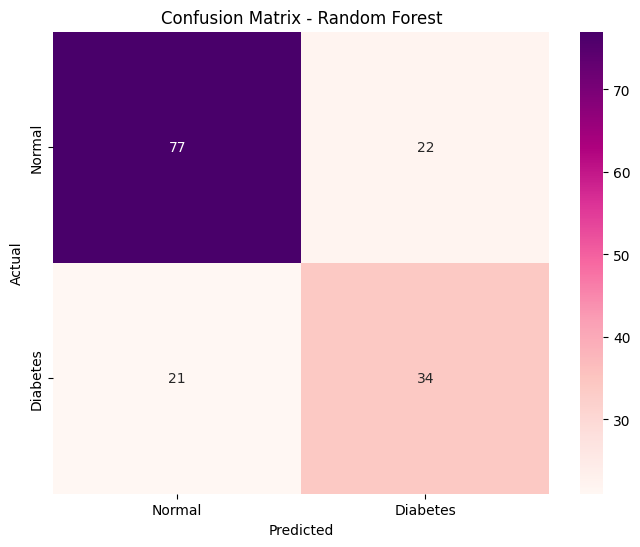

In [ ]:
rf_pred = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='RdPu', xticklabels=['Normal', 'Diabetes'], yticklabels=['Normal', 'Diabetes'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()